# Regular languages

We use the following mathmatical notation to desribe a FSM:

| Symbol | Definition |
| --- | :--- |
| $M$ | The machine |
| $Q$ | The set of states |
| $\Sigma$ | the alphabet (tokens the machine can process) |
| $B$ | the set of start states |
| $A$ | the set of accepting states |
| $\delta$ | the set of transitions where each transition is a set (current state, symbol, next state) $(Q \times \Sigma \times Q)$ |

Thus are definition of a deterministic automaton is

|   |   |
| :--- | --- |
| A single start state | <div style="width: 220px">$B = \{s_0\}$</div> |
| A next state function | $F: Q \times \Sigma \rightarrow Q$ |
| ... such that | $\delta = \{(q, s, F(q, s)) \mid (q, s) \in Q \times \Sigma\}$ |

A language is a set of finite strings
$$
L \in \Sigma*
$$
L is all strings that are finite sequences of the tokens from $\Sigma$ including the empty string $\epsilon$.

The general definition for what is means for a machine to recognize a string is as follows

| | |
| :--- | --- |
| If we have a string | <div style="width: 200px">$s = <x_0, x_1, x_{n-1}> \in \Sigma*$</div> |
| A trace (path) for s in the machine M is a sequence of states | $<q_0, q_1, ..., q_n> \in Q*$ | 
| ... such that their exsists a transition between them | $(q_i, x_i, q_{i+1}) \in \delta$ (for $i < n$) |

The string $s$ is accepted if the exsistes a trace from an initial state to an acceptor state. The language of $M$ describes all the strings the machine can accept, thus:
$$
L(M) \subseteq \Sigma*
$$
Two machines are equivilent if they have the same language.

A __regular language__ is a language represented by some DFA.

## Converting a NFA to a DFA

Consider the following machines:

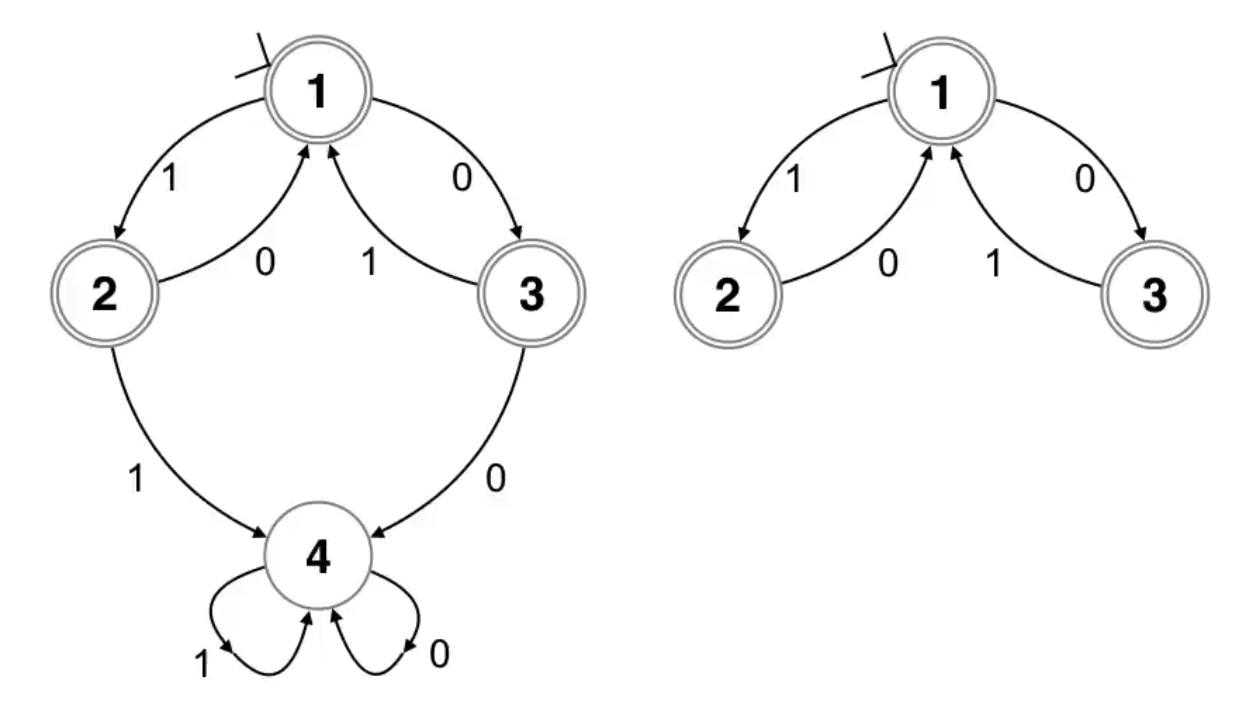

They both define the same language since
- state 4 (on the left) is a blackhole state
- no trace that enters 4 is accepted
- thus all accepted strings only parse through states 1, 2 and 3

The FSM on the right however is not deterministic since:
- their is no transition from 2 with input 1
- their is no transition from 3 with input 0

To convert it into a DFA we add a transition to the blackhole state for every missing transitions.

## Abstraction
What happens when we remove one letter from a regular language, is it still regular. 

We know we can convert NFA to DFA, so if we can prove that we can remove letters for a NFA alphabet we can do the same for DFA's.

The solution is quite simple. Say we want to remove $\epsilon$. 
- For every $(p, \epsilon, q) \in \delta$ remove it
- For every $(\_, \_, q) \in \delta$ add a transition $(\_, \_, p) \in \delta$
- If $q$ is a start state, make $p$ a start state

Effectivly we 'skip' over the symbol that we want to remove:
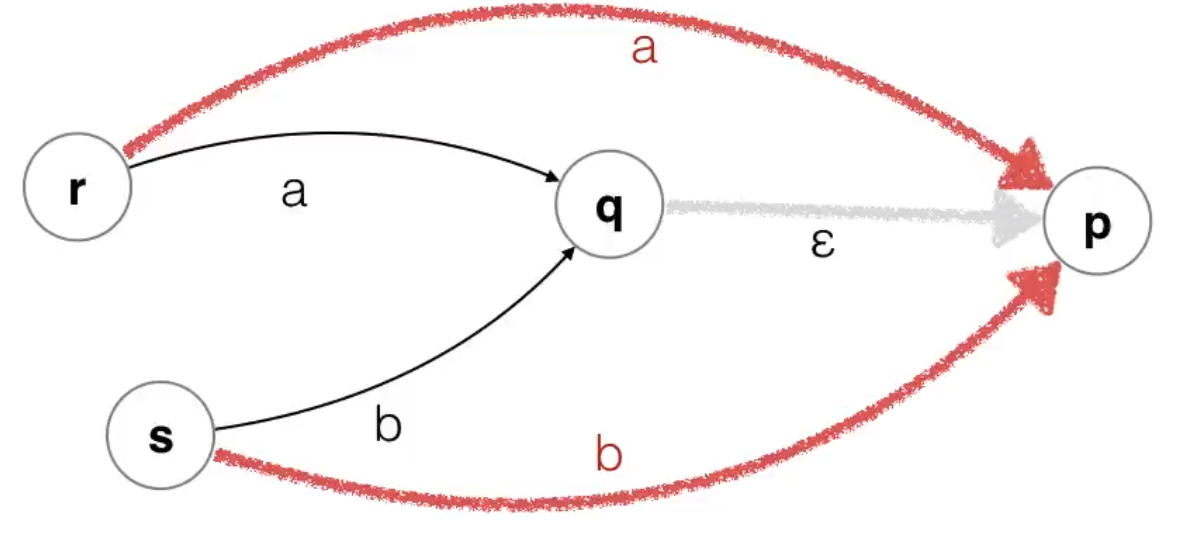

## Parralel states

A non-determanisic machine (NFA) may have many transitions with the same input letter. Consider the following graph:

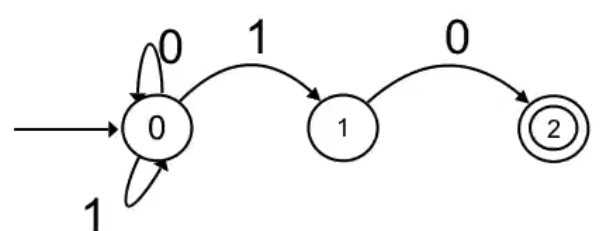

It accepts all strings the end in 10. When we trace through the graph we follow both transitions in parrallel, so now their are two possible states the machine could be in. If one of those states is an acceptor state when the input ends then we know their is a valid trace throught the machine for that input.

To convert this to a deterministic finitie state machine, we can make the observation that the states that are active at any one time can themselves be represented as a single state, thus the machine will be deterministic. To convert the example lets first look at its tabular form

|     | 0   | 1   |
| --- | --- | --- |
| __0__ | 0   | 0, 1 |
| __1__ | 2   | -  |
| __2__ | -   | -  |

Now if we consider (0, 1) to be its own seperate state we get this:

|     | 0 | 1 |
| --- | --- | --- |
| __0, 1__ | 0, 2 | 0, 1 |

Likewise for (0, 2):

|     | 0 | 1 |
| --- | --- | --- |
| __0, 1__ | 0, 2 | 0, 1 |
| __0, 2__ | 0 | 0, 1 |

Which results in this graph:

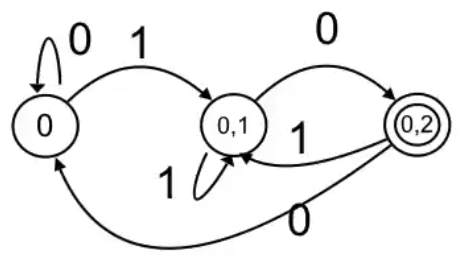

## Internal transition

Sometimes NFA will have an empty transition ($\epsilon$) which means no input. This means that whenever state 1 is reached state 0 is also active (as above).

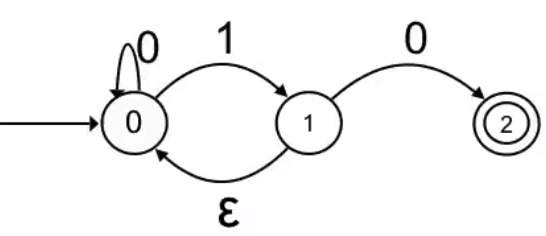

The tabular form is as follows:

| | 0 | 1 | $\epsilon$ |
| --- | --- | --- |
| __0__ | 0 | 1 | - |
| __1__ | 2 | - | 0 |
| __2__ | - | - | - |

Since $\epsilon$ consumes no input we find the list of states with no or many $\epsilon$'s:

| | $0\epsilon*$ | $1\epsilon*$ |
| --- | --- | --- |
| 0 | 0 | 0, 1 |
| 1 | 2 | - |
| 2 | - | - |
| 0, 1 | 0, 2 | 0, 1 |
| 0, 2 | 0 | 0, 1 |

The final graph looks like this:

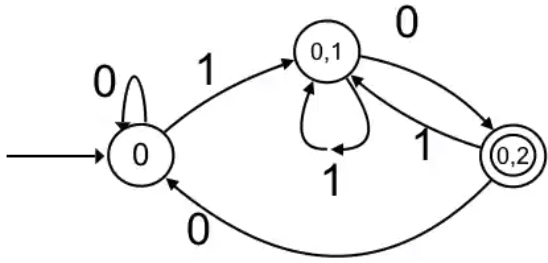

## Regular expression operations

Their are 3 simple operations that make up regular expressions.

### Sequence
If you want to match language R followed by language S, then we can connect the end states of R to each start state of S with $\epsilon$ transitions like so:

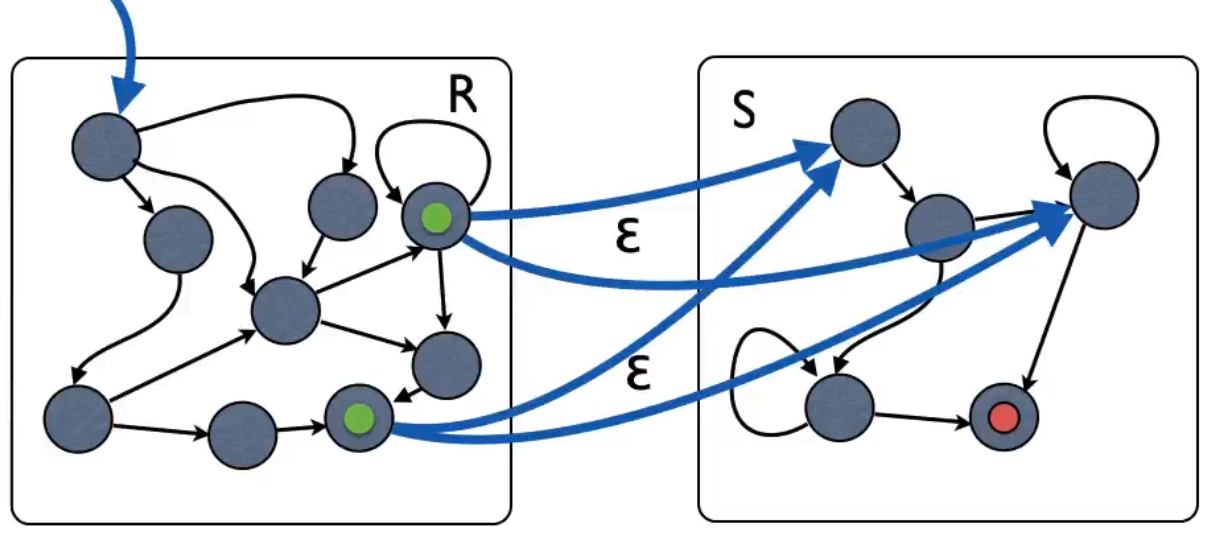

### Alternation
Since NFA can have multiple start states, alternation is as simple as putting the two machines together:

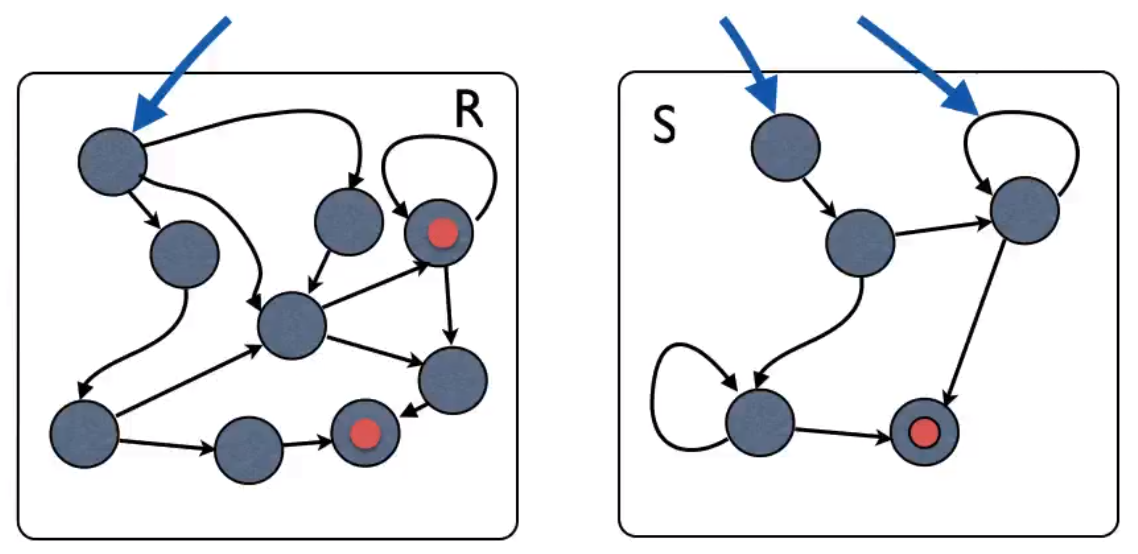

### Iteration
To simulate iteration we create a new acceptor state. All the end states connect to the new state and the new state connects to the start.

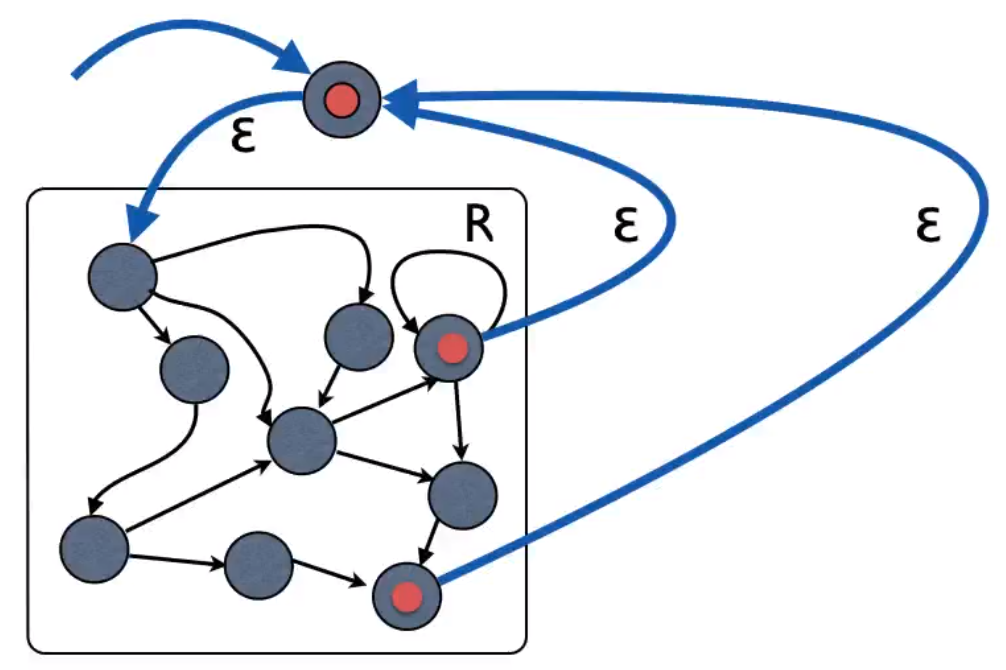

From this we can derive all the other regular expression operators such as ? and +.